In [1]:
#Each neuron is in the form of o= f(w*x + b)
#w typically a scalar/matrix
#b scalar/bector(dimensionality of inputs and weights must match)
#activation functions that work well are ones that asymptotically approach -1 or 0 when approaching -inf and likewise for +inf
#AF's must be non-linear and differentiable 
#have a sensitive range and insensitive range 
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)


In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([9, 1, 6, 4, 7, 8, 3, 2, 0]), tensor([ 5, 10]))

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [5]:
import torch.nn as nn
linear_model = nn.Linear(1, 1) #takes three args, number of input features, number of output features, and bias =True(def)/false
linear_model(t_un_val)

tensor([[4.7789],
        [6.4036]], grad_fn=<AddmmBackward>)

In [6]:
linear_model.weight

Parameter containing:
tensor([[0.8332]], requires_grad=True)

In [7]:
linear_model.bias

Parameter containing:
tensor([0.7047], requires_grad=True)

In [8]:
x = torch.ones(1)
linear_model(x)

tensor([1.5379], grad_fn=<AddBackward0>)

In [9]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[1.5379],
        [1.5379],
        [1.5379],
        [1.5379],
        [1.5379],
        [1.5379],
        [1.5379],
        [1.5379],
        [1.5379],
        [1.5379]], grad_fn=<AddmmBackward>)

In [10]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [11]:
linear_model.parameters()

<generator object Module.parameters at 0x00000145BFC879E0>

In [12]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.9561]], requires_grad=True),
 Parameter containing:
 tensor([-0.2319], requires_grad=True)]

In [13]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [14]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 248.4878, Validation loss 360.8452
Epoch 1000, Training loss 3.7071, Validation loss 3.6052
Epoch 2000, Training loss 3.1650, Validation loss 2.3416
Epoch 3000, Training loss 3.1538, Validation loss 2.1823

Parameter containing:
tensor([[5.2399]], requires_grad=True)
Parameter containing:
tensor([-16.7294], requires_grad=True)


In [15]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 115.1885, Validation loss 168.9688
Epoch 1000, Training loss 3.6953, Validation loss 3.5877
Epoch 2000, Training loss 3.1648, Validation loss 2.3395
Epoch 3000, Training loss 3.1538, Validation loss 2.1821

Parameter containing:
tensor([[5.2400]], requires_grad=True)
Parameter containing:
tensor([-16.7299], requires_grad=True)


In [16]:
#Building a nn
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [17]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [18]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [19]:

from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [20]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [21]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 175.4014, Validation loss 256.0537
Epoch 1000, Training loss 7.0424, Validation loss 4.1773
Epoch 2000, Training loss 4.8901, Validation loss 5.0004
Epoch 3000, Training loss 2.7444, Validation loss 1.3448
Epoch 4000, Training loss 2.3274, Validation loss 0.6351
Epoch 5000, Training loss 2.3009, Validation loss 0.6614
output tensor([[ 7.8975],
        [21.2441]], grad_fn=<AddmmBackward>)
answer tensor([[ 8.],
        [21.]])
hidden tensor([[-1.1091e+01],
        [ 1.0991e+01],
        [-1.1547e+01],
        [ 1.4737e-01],
        [-2.5043e-01],
        [-2.0521e+00],
        [ 9.8719e-04],
        [ 1.1724e+01]])


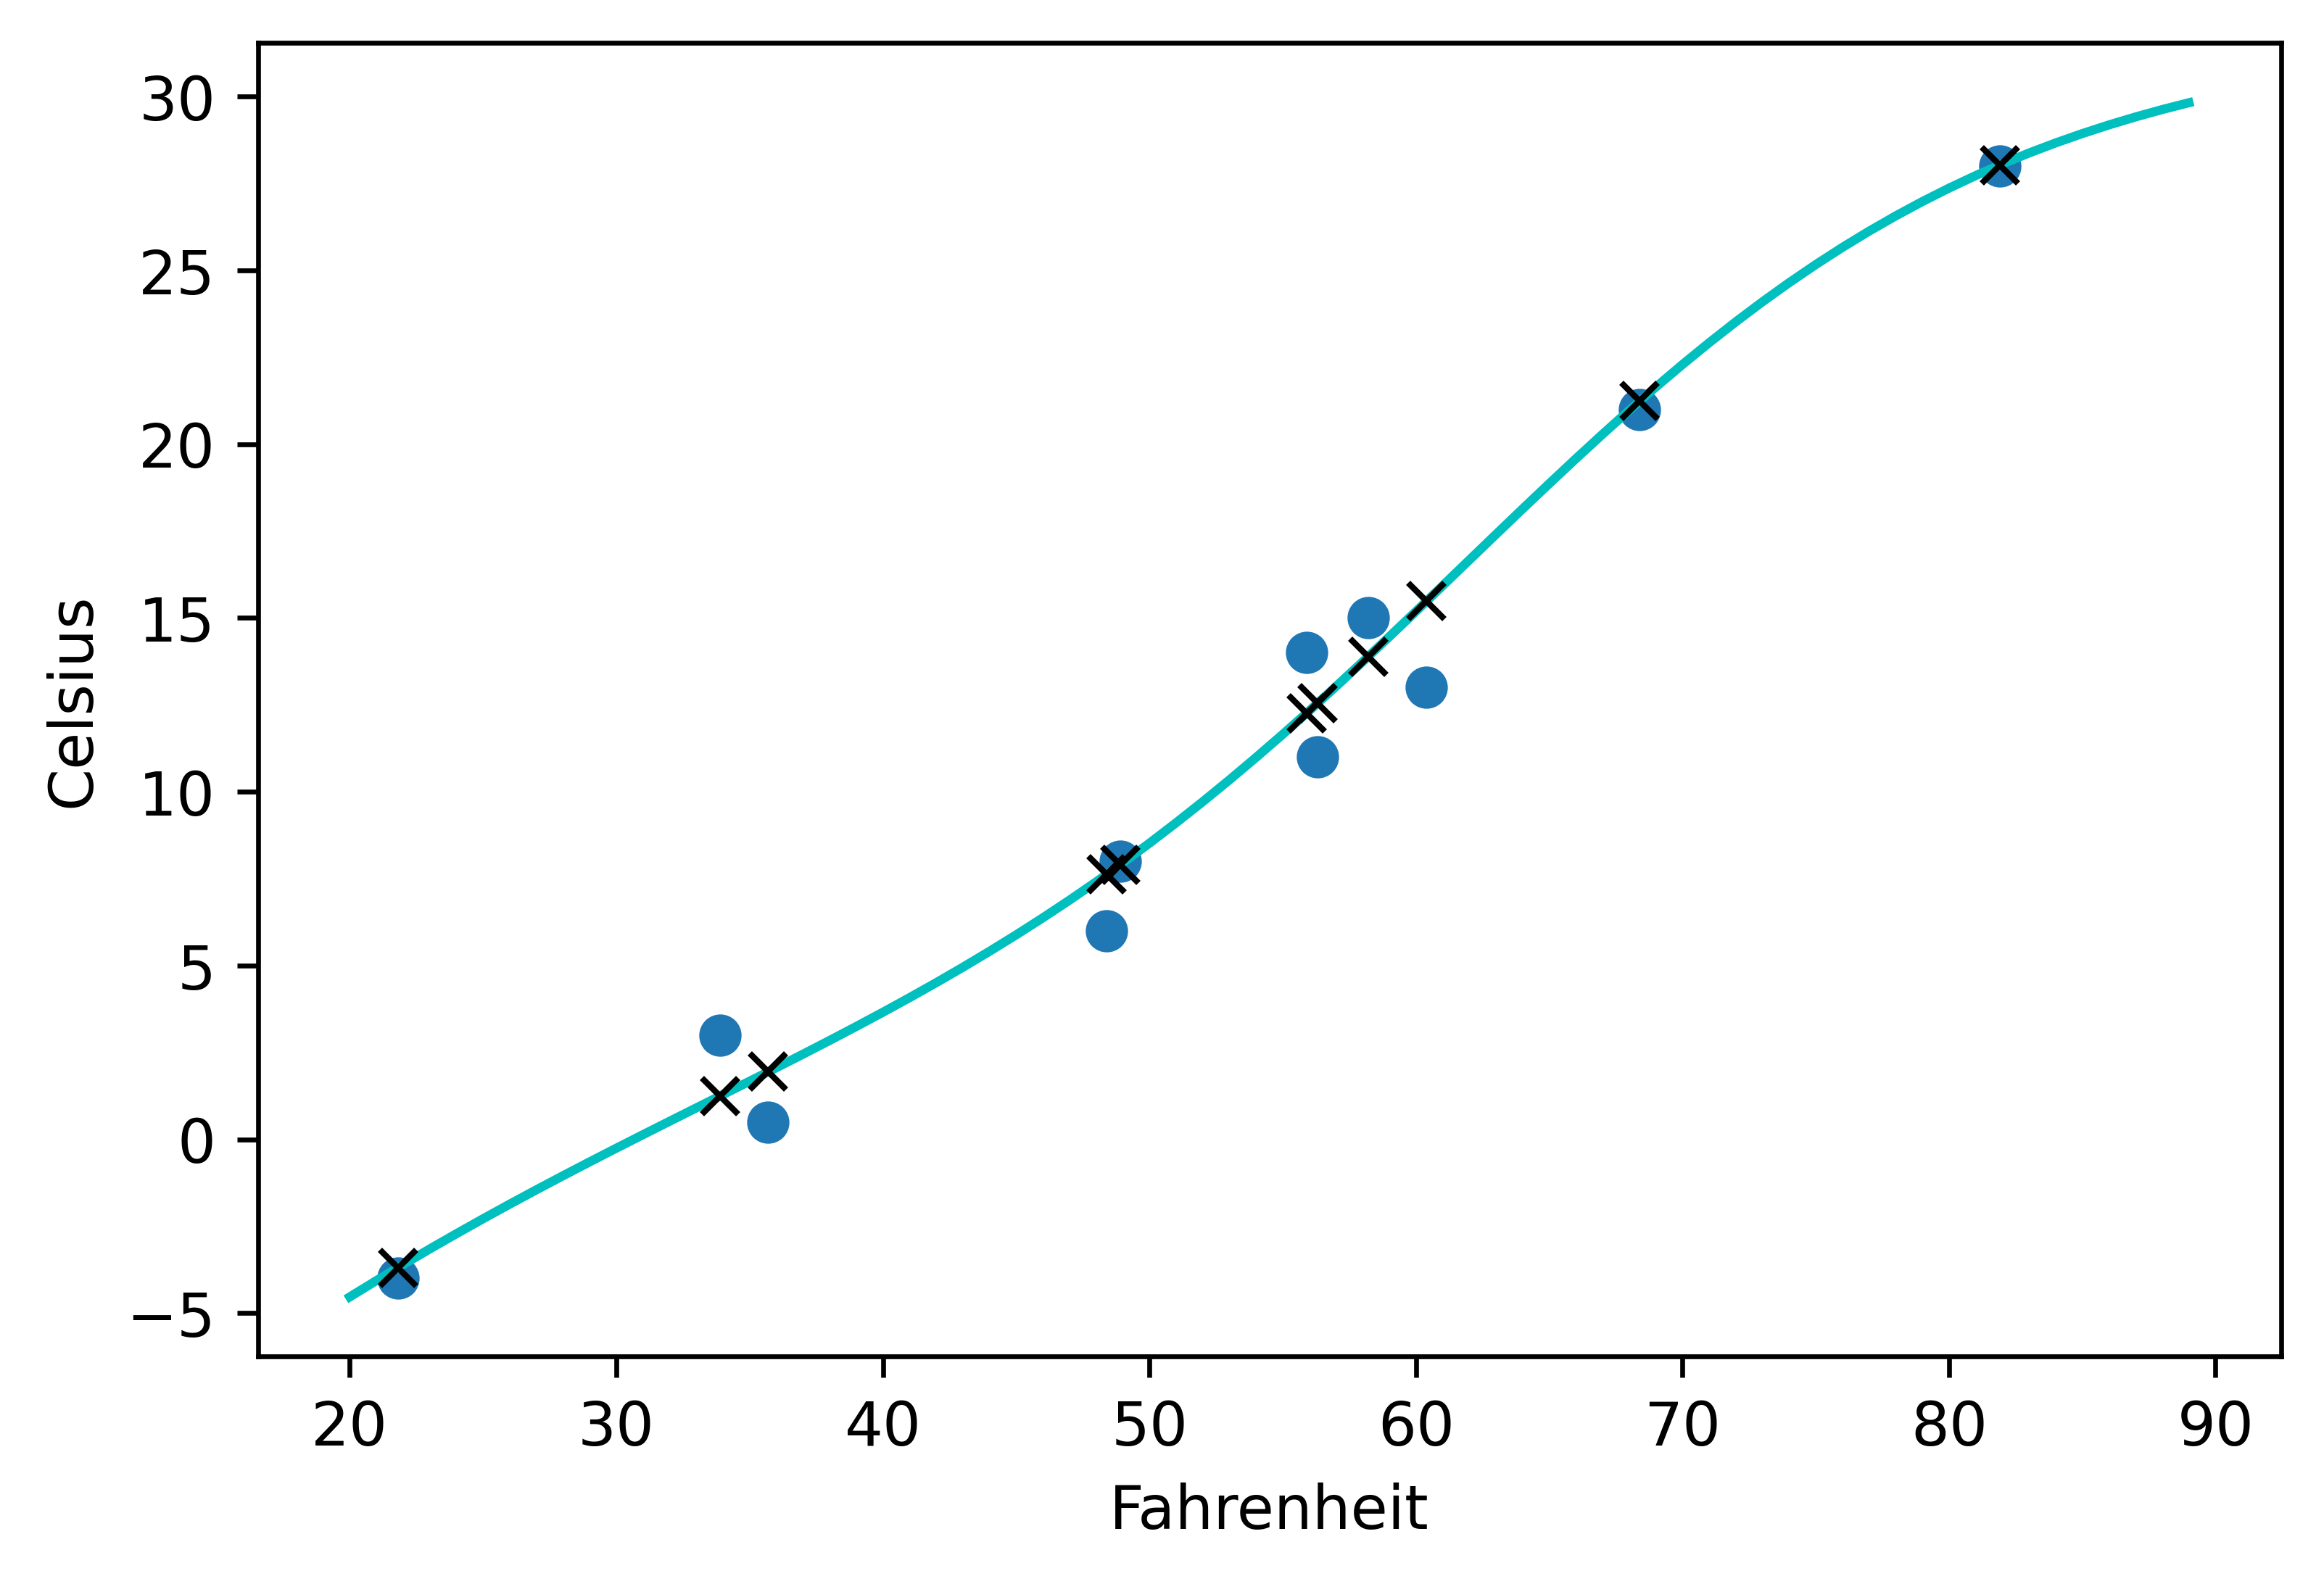

In [22]:

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Epoch 1, Training loss 170.2275, Validation loss 248.5203
Epoch 1000, Training loss 61.1731, Validation loss 54.7362
Epoch 2000, Training loss 43.7557, Validation loss 39.2397
Epoch 3000, Training loss 27.0187, Validation loss 25.2620
Epoch 4000, Training loss 16.7825, Validation loss 15.5173
Epoch 5000, Training loss 10.9111, Validation loss 9.3665


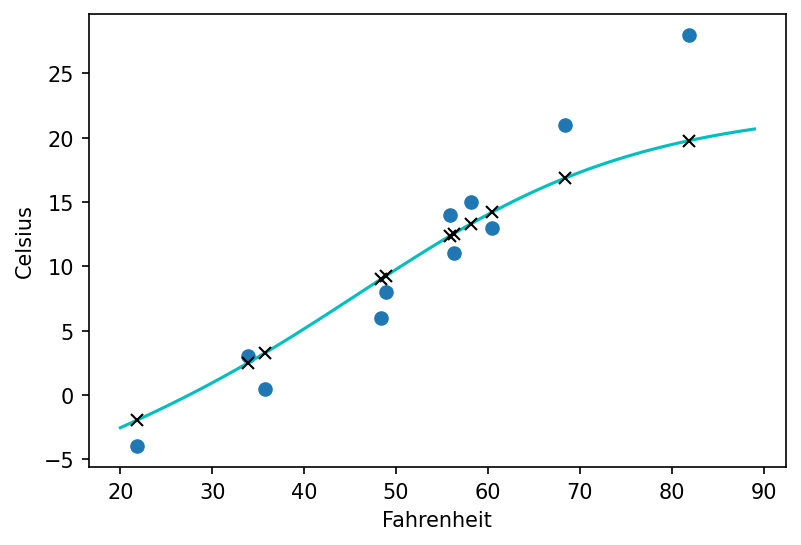

In [25]:
neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')